# 케라스 CNN Fashion MNIST

<br>

#### module import

In [17]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [19]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

<br>

### 데이터 로드 및 전처리

In [20]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<br>

### 모델 구성 및 컴파일
- 임의의 모델

In [27]:
def build_model():
  model = Sequential()
  
  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3, 3))(input)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = Conv2D(filters=32, kernel_size=(3, 3))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model

In [28]:
model_1 = build_model()

model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 22, 22, 32)        18464     
                                                                 
 flatten_2 (Flatten)         (None, 15488)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               1982592   
                                                                 
 dense_7 (Dense)             (None, 64)                8256

<br>

### 모델 학습
- 런타임 GPU로 설정

In [29]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs=25, validation_split=0.3,
                     batch_size=128, verbose=False)

<br>

### 학습 결과 시각화

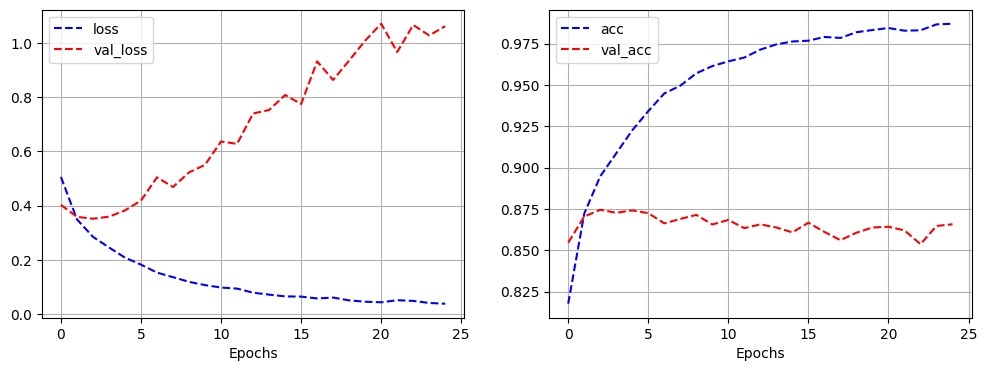

In [30]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'], 'b--', label='acc')
plt.plot(hist_1.history['val_acc'], 'r--', label='val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

<br>

### 모델 평가

In [31]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1563 - acc: 0.8588


[1.1562621593475342, 0.8587999939918518]

<br>

### 모델 재구성
- 학습 파라미터의 수 비교

In [33]:
def build_model2():
  model = Sequential()
  
  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3, 3))(input)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Conv2D(filters=32, kernel_size=(3, 3))(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model

model_2 = build_model2()
model_2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 32)          1846

<br>

### 모델 재학습

In [34]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs=25, validation_split=0.3,
                     batch_size=128, verbose=False)

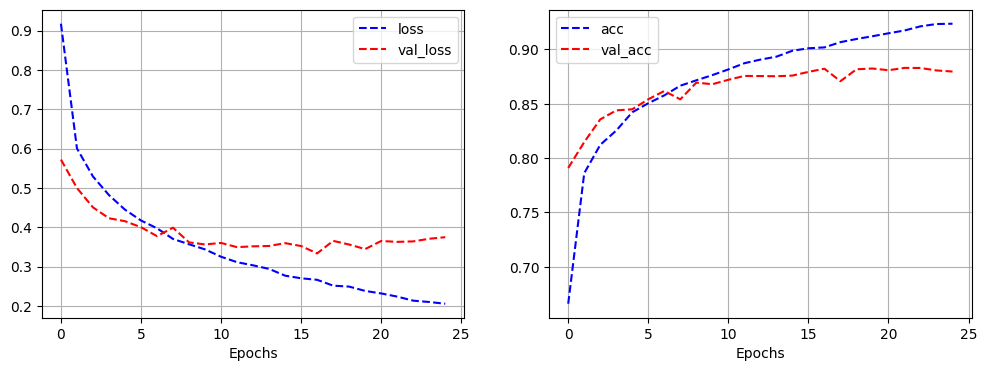

In [35]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label='acc')
plt.plot(hist_2.history['val_acc'], 'r--', label='val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

<br>

### 모델 재평가

In [36]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3809 - acc: 0.8736


[0.380897581577301, 0.8736000061035156]

<br>

<br>

## 모델 성능 높이기 - 많은 레이어 쌓기

In [37]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [38]:
def build_model3():
  model = Sequential()
  
  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input)
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(input)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Dropout(0.3)(output)

  output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
  output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(units=256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=100, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

  return model

model_3 = build_model3()
model_3.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 256)       295168    
                                                           

<br>

### 모델 학습 및 결과 시각화

In [39]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs=25, validation_split=0.3,
                     batch_size=128, verbose=False)

- **과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음**

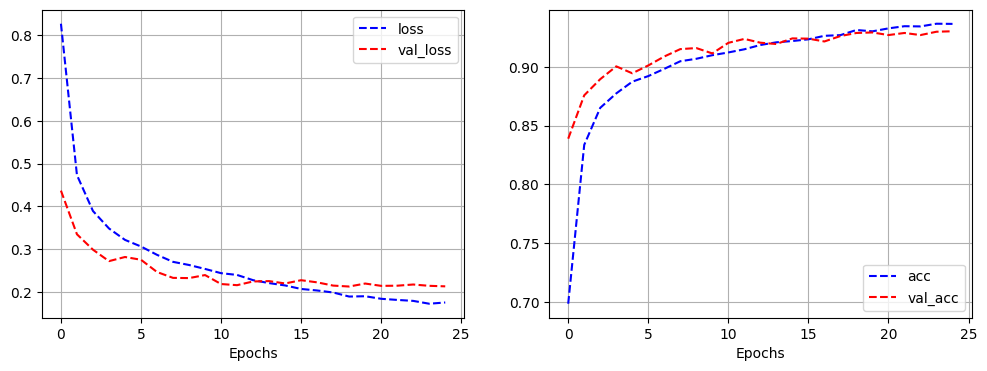

In [40]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_3.history['loss'], 'b--', label='loss')
plt.plot(hist_3.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history['acc'], 'b--', label='acc')
plt.plot(hist_3.history['val_acc'], 'r--', label='val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [41]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2274 - acc: 0.9242


[0.22739282250404358, 0.9241999983787537]

<br>

<br>

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

<br>

#### `tensorflow.keras.preprocessing.image.ImageDataGenerator(rotation_range, zoom_range, shear_range, width_shift_range, height_shift_range, horizontal_flip, vertical_flip)`

- `rotation_range` : 이미자 회전
- `zoom_range` : 이미지 확대
- `shear_range` : 이미지 기울기
- `width_shift_range`: 이미지 좌우이동
- `height_shift_range` : 이미지 상하이동
- `horizontal_flip` : 이미지 가로 뒤집기
- `vertical_flip` : 이미지 세로 뒤집기

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

In [62]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    shear_range=0.6,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [63]:
augment_size  = 200

In [64]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [65]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1),
                                 np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

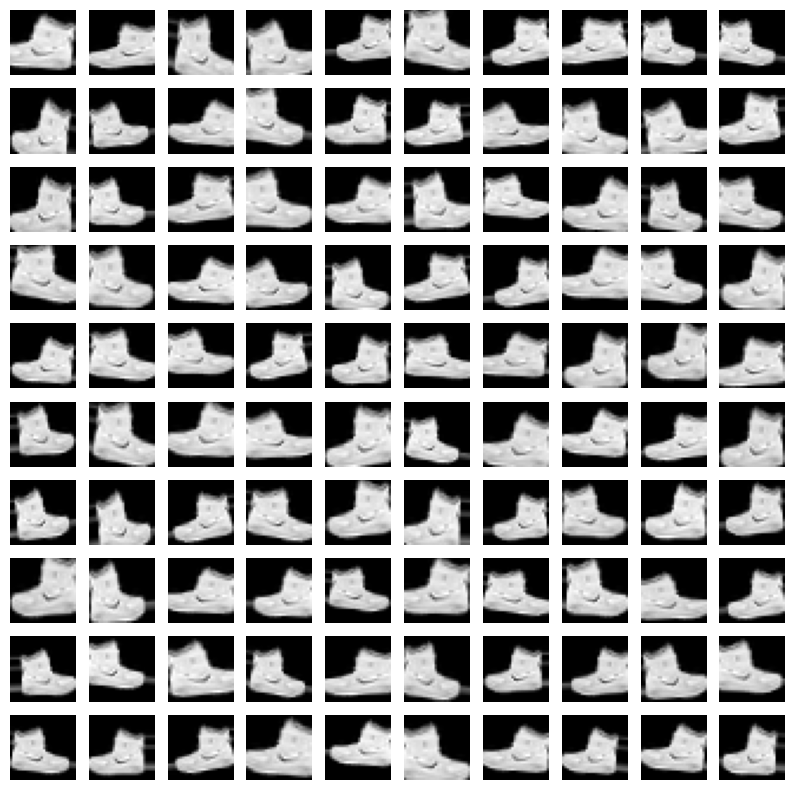

In [66]:
plt.figure(figsize=(10, 10))

for i in range(1, 101):
  plt.subplot(10, 10, i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28, 28), cmap='gray')

<br>


데이터 추가

In [67]:
image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [68]:
augment_size=30000

In [69]:
random_mask = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [70]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

(90000, 28, 28, 1)
(90000,)


<br>


### 모델 학습 및 결과 시각화

In [71]:
model_4 = build_model3()

In [72]:
hist_4 = model_4.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128, verbose=False)

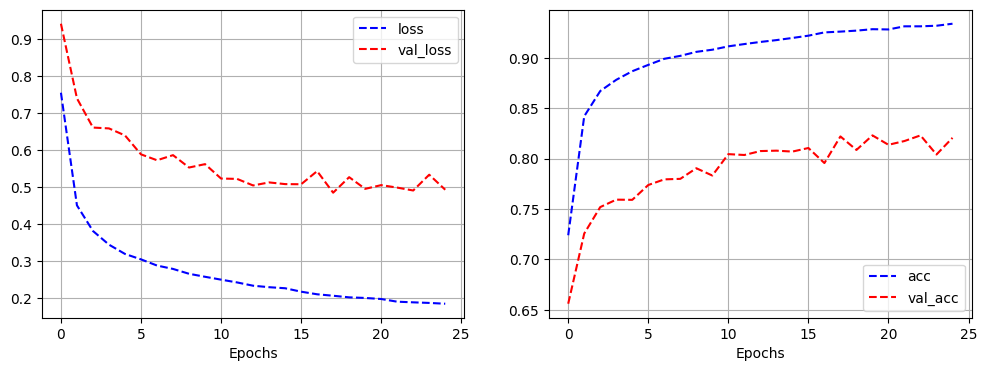

In [73]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_4.history['loss'], 'b--', label='loss')
plt.plot(hist_4.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history['acc'], 'b--', label='acc')
plt.plot(hist_4.history['val_acc'], 'r--', label='val_acc')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

<br>

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [75]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2025 - acc: 0.9313


[0.20250974595546722, 0.9312999844551086]